In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Churn Modeling dataset
churn_data = pd.read_csv('/content/sample_data/Churn_Modelling.csv')

In [21]:
print("Shape of data: ", churn_data.shape, "\n")
churn_data.describe()

Shape of data:  (10000, 14) 



,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [22]:
# 1. Data Cleaning and Handling Noisy Data
# Let's start by dropping duplicates
churn_data = churn_data.drop_duplicates()
churn_data = churn_data.dropna()
churn_data = churn_data.drop(columns=["RowNumber",'Surname','CustomerId'])
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


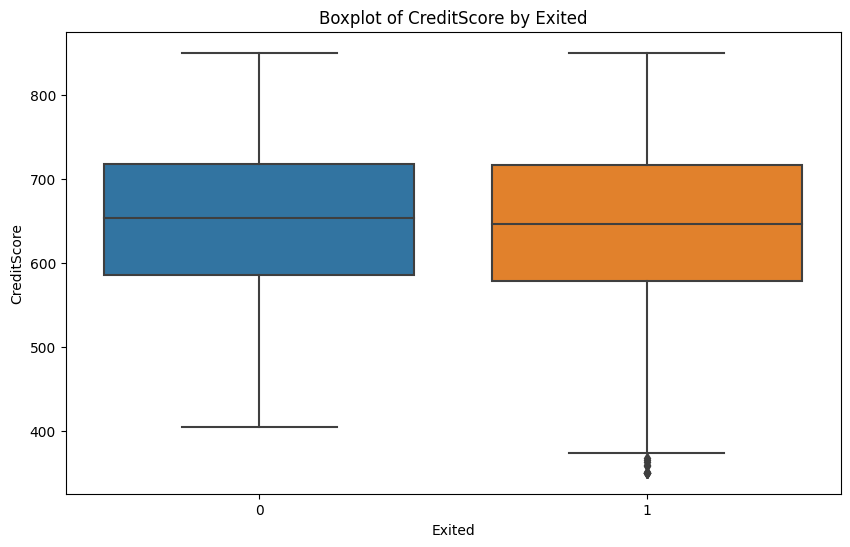

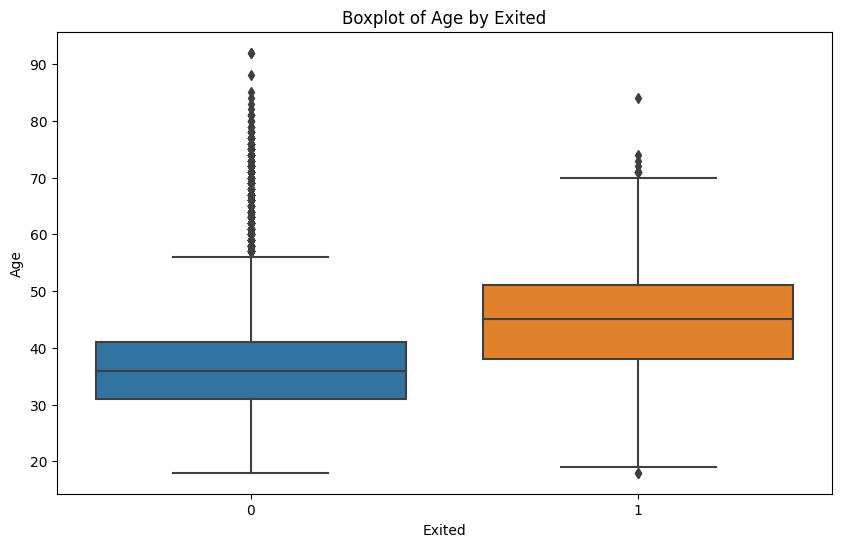

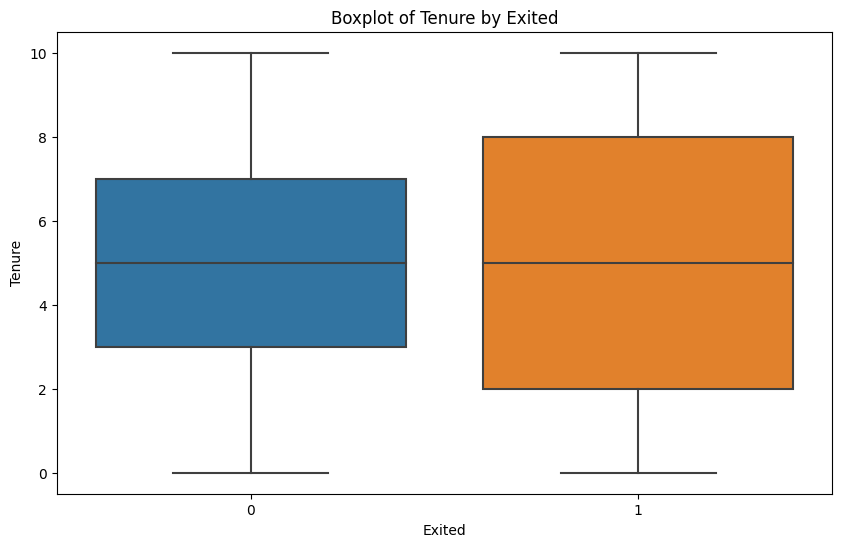

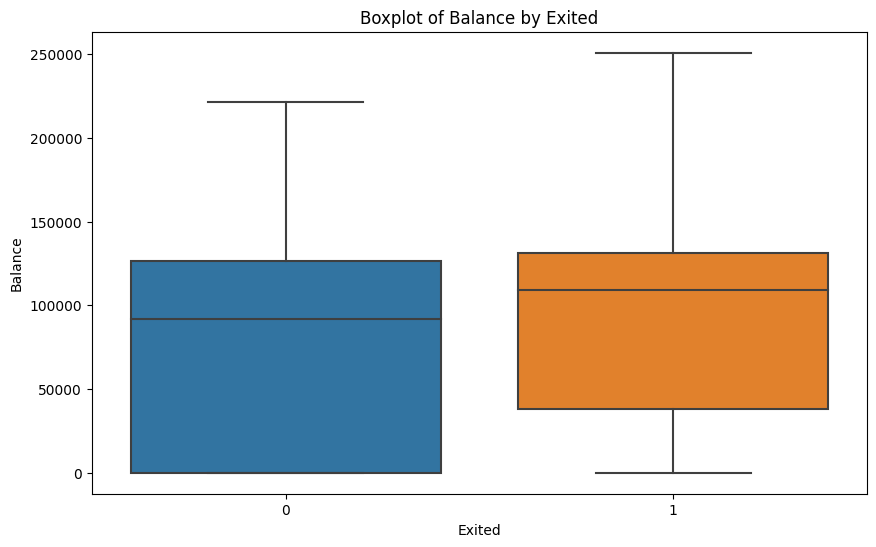

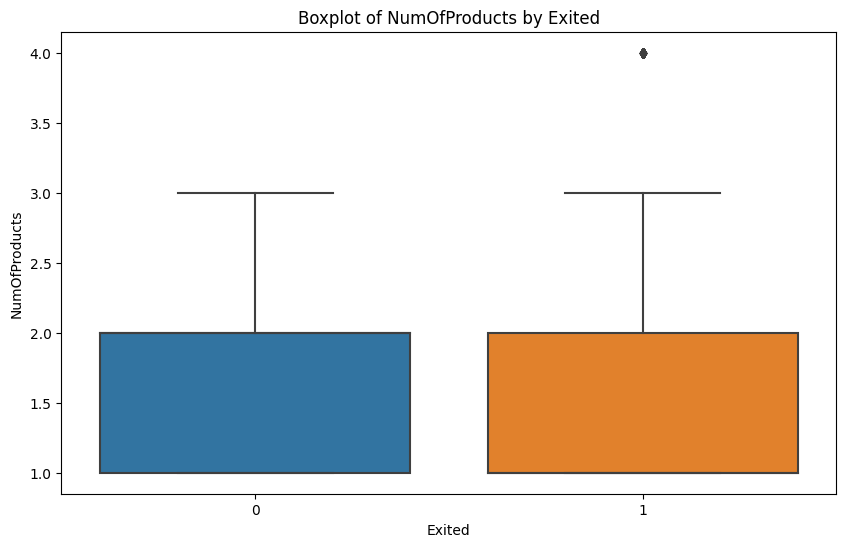

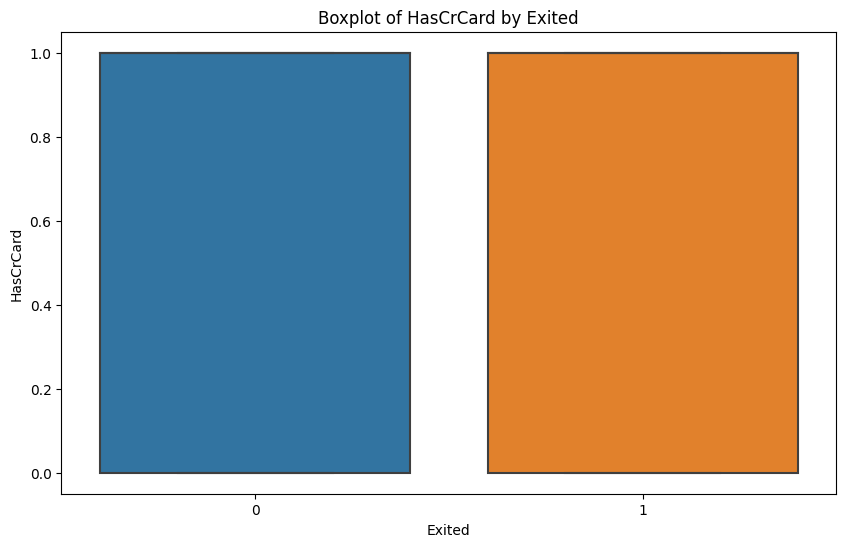

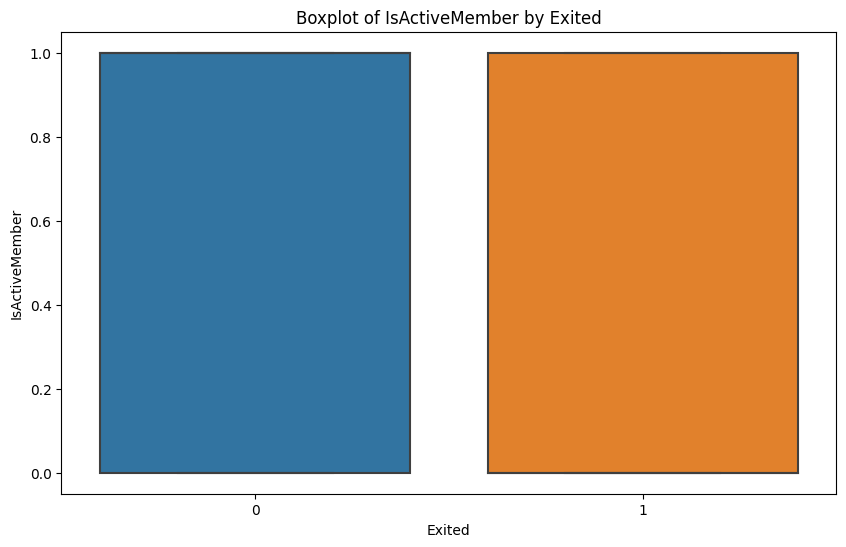

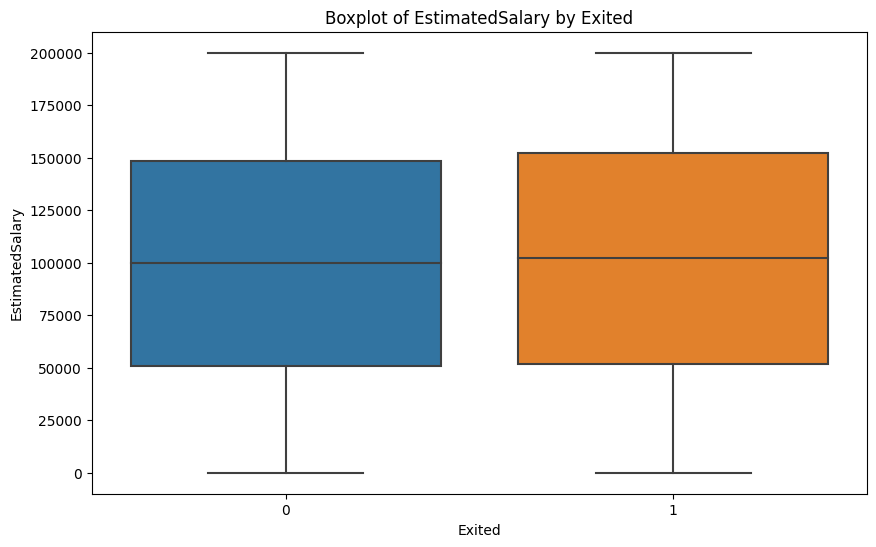

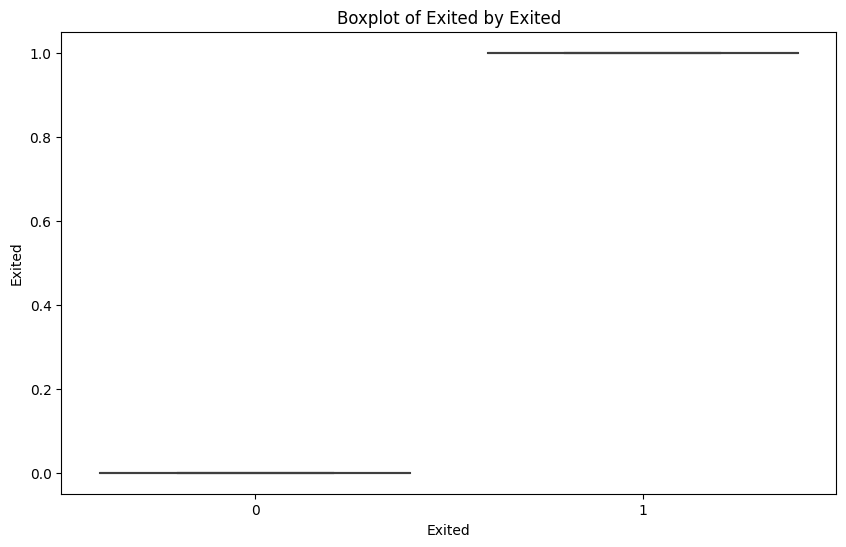

In [23]:
# 2. Outlier Detection and Handling
num_features = churn_data.select_dtypes(include=[np.number]).columns
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Exited', y=feature, data=churn_data)
    plt.title(f'Boxplot of {feature} by Exited')
    plt.show()

Q1 = churn_data[num_features].quantile(0.25)
Q3 = churn_data[num_features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
churn_data_no_outliers = churn_data[~((churn_data[num_features] < lower_bound) | (churn_data[num_features] > upper_bound)).any(axis=1)]

<ipython-input-24-0799d76bff78>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(churn_data_no_outliers.corr(), annot=True, cmap='coolwarm')


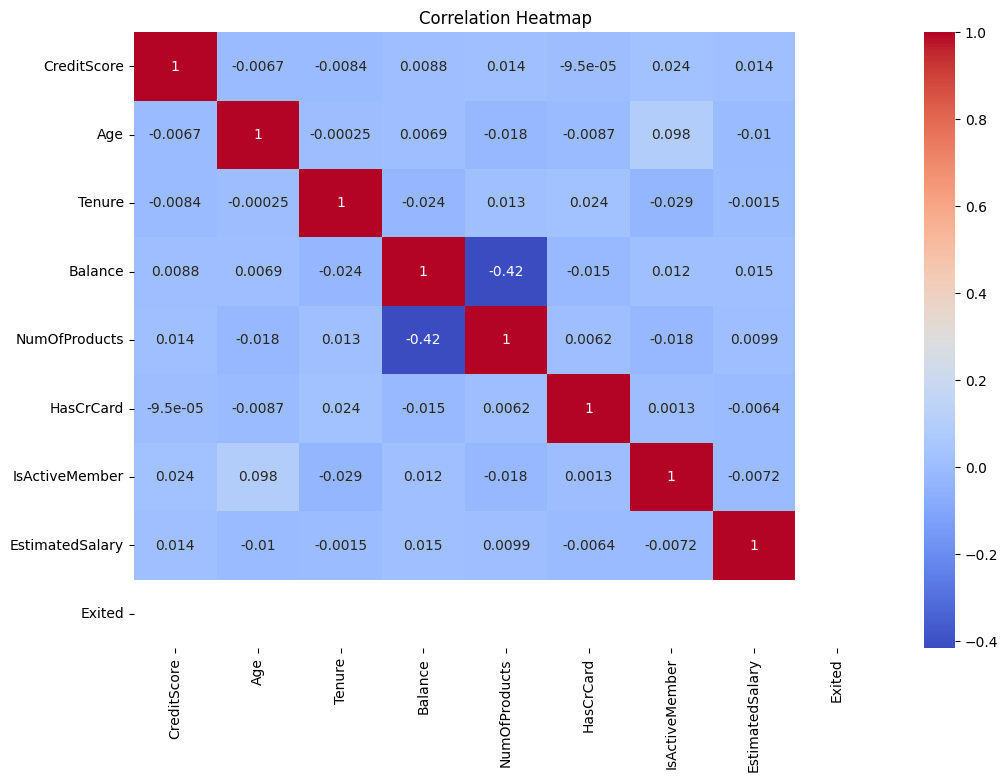

In [24]:
# 3. Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 8))
sns.heatmap(churn_data_no_outliers.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
# 4. Min-Max Normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(churn_data_no_outliers[num_features])

In [26]:
# 5. PCA
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(normalized_data)

In [29]:
# 6. Feature Selection
X = pca_data
y = churn_data_no_outliers['Exited']

selector = SelectKBest(score_func=f_classif, k=8)
selected_features = selector.fit_transform(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)

# Fit RandomForestClassifier to training data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)


In [30]:
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1536

    accuracy                           1.00      1536
   macro avg       1.00      1.00      1.00      1536
weighted avg       1.00      1.00      1.00      1536

